In [2]:
#Frequently used libraries in Module 3 & 4
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# for modeling
df = pd.read_csv("./data/data_pepTestCustomers.csv")
# for deployment
new = pd.read_csv("./data/data_pepNewCustomers.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id             600 non-null object
age            600 non-null int64
sex            600 non-null int64
region         600 non-null int64
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 56.3+ KB


In [11]:
df.head(10)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,0,0,17546.00,0,1,0,0,0,0,1
1,ID12102,40,1,3,30085.10,1,3,1,0,1,1,0
2,ID12103,51,0,0,16575.40,1,0,1,1,1,0,0
3,ID12104,23,0,3,20375.40,1,3,0,0,1,0,0
4,ID12105,57,0,1,50576.30,1,0,0,1,0,0,0
5,ID12106,57,0,3,37869.60,1,2,0,1,1,0,1
6,ID12107,22,1,1,8877.07,0,0,0,0,1,0,1
7,ID12108,58,1,3,24946.60,1,0,1,1,1,0,0
8,ID12109,37,0,2,25304.30,1,2,1,0,0,0,0
9,ID12110,54,1,3,24212.10,1,2,1,1,1,0,0


In [13]:
df.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.395000,0.500000,1.231667,27524.031217,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.424947,0.500417,1.286113,12899.468246,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.000000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,55.250000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,63130.100000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cfb1c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e5beef0>]], dtype=object)

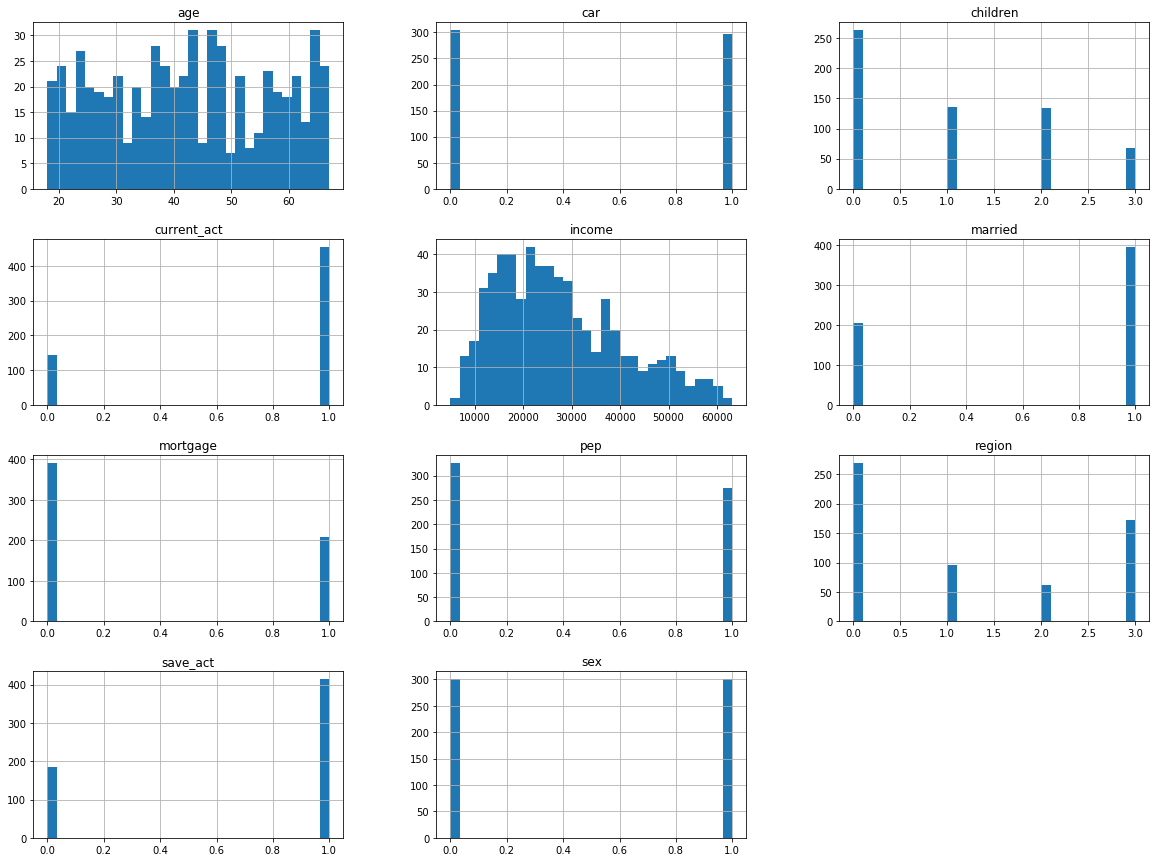

In [15]:
df.hist(bins=30, figsize=(20,15))

In [17]:
print(new.shape)
new.tail()

(200, 11)


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
195,ID12896,66,1,0,58792.6,0,1,1,1,1,1
196,ID12897,19,1,0,17906.8,0,2,1,1,0,0
197,ID12898,54,1,1,29348.8,0,0,0,0,1,1
198,ID12899,42,0,3,20552.5,1,0,1,1,1,0
199,ID12900,34,1,0,25843.1,0,2,0,1,1,0


In [18]:
df.corr()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
age,1.000000,-0.090081,0.011167,0.752726,0.010394,0.023572,0.077733,0.184389,-0.035312,-0.016154,0.173825
sex,-0.090081,1.000000,-0.035018,-0.023845,0.021110,-0.014206,0.006667,0.007207,-0.019466,0.066465,0.046843
region,0.011167,-0.035018,1.000000,-0.000212,0.006188,0.011520,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.752726,-0.023845,-0.000212,1.000000,-0.008386,0.036761,0.081556,0.266164,0.031616,-0.014662,0.221991
married,0.010394,0.021110,0.006188,-0.008386,1.000000,-0.048716,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
children,0.023572,-0.014206,0.011520,0.036761,-0.048716,1.000000,0.036455,0.041536,0.006238,-0.074339,-0.057663
car,0.077733,0.006667,0.021860,0.081556,-0.009571,0.036455,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act,0.184389,0.007207,0.084382,0.266164,0.028604,0.041536,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act,-0.035312,-0.019466,-0.013356,0.031616,-0.059996,0.006238,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage,-0.016154,0.066465,0.026083,-0.014662,-0.021711,-0.074339,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


In [19]:
df.corr().pep.sort_values(ascending=False)

pep            1.000000
income         0.221991
age            0.173825
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

age       Axes(0.125,0.536818;0.775x0.343182)
income       Axes(0.125,0.125;0.775x0.343182)
dtype: object

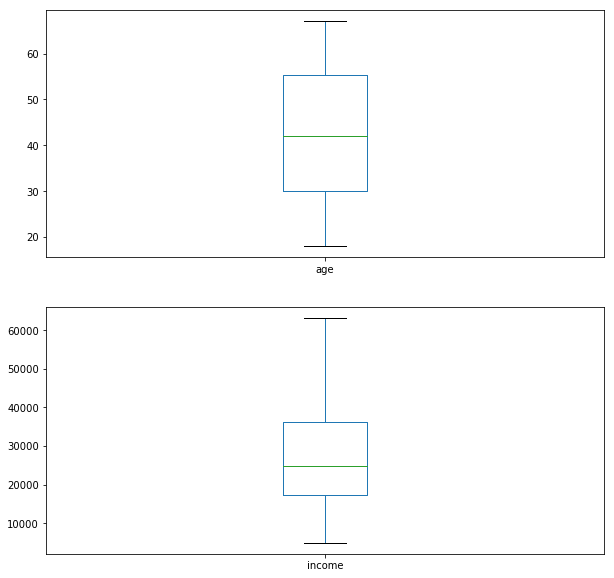

In [20]:
df.loc[:,['age','income']].plot.box(subplots=True, layout=(2,1), figsize=(10,10))

In [41]:
mdf =  df.copy()

In [42]:
mdf['realincome'] = np.where(mdf['children']==0, mdf['income'], mdf['income']/mdf['children'])

In [43]:
mdf.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48,0,0,17546.0,0,1,0,0,0,0,1,17546.000000
1,ID12102,40,1,3,30085.1,1,3,1,0,1,1,0,10028.366667
2,ID12103,51,0,0,16575.4,1,0,1,1,1,0,0,16575.400000
3,ID12104,23,0,3,20375.4,1,3,0,0,1,0,0,6791.800000
4,ID12105,57,0,1,50576.3,1,0,0,1,0,0,0,50576.300000


In [44]:
#axis  0이 row, 1이 column
mdf = mdf.drop(['income','children'], axis=1)
mdf.head()

,id,age,sex,region,married,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48,0,0,0,0,0,0,0,1,17546.000000
1,ID12102,40,1,3,1,1,0,1,1,0,10028.366667
2,ID12103,51,0,0,1,1,1,1,0,0,16575.400000
3,ID12104,23,0,3,1,0,0,1,0,0,6791.800000
4,ID12105,57,0,1,1,0,1,0,0,0,50576.300000


### Split Data

In [45]:
from sklearn.model_selection import train_test_split # for Hold-out validation

In [46]:
dfX = mdf.drop(['id','pep'], axis=1) # exclude 'id' and 'pep' attribute & class variable
dfY = mdf['pep']

In [47]:
mdf.head()

,id,age,sex,region,married,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48,0,0,0,0,0,0,0,1,17546.000000
1,ID12102,40,1,3,1,1,0,1,1,0,10028.366667
2,ID12103,51,0,0,1,1,1,1,0,0,16575.400000
3,ID12104,23,0,3,1,0,0,1,0,0,6791.800000
4,ID12105,57,0,1,1,0,1,0,0,0,50576.300000


In [49]:
X_train, X_test, y_train, y_test = train_test_split(dfX,dfY, test_size=0.25, random_state=0)

In [51]:
print(X_train.shape,X_test.shape)

(450, 9) (150, 9)


In [52]:
X_train.head()

,age,sex,region,married,car,save_act,current_act,mortgage,realincome
46,50,0,0,0,1,1,1,0,13283.9
263,60,0,0,1,1,1,1,1,46358.4
458,18,1,2,0,0,1,1,0,13700.2
230,59,0,0,1,1,0,1,1,30189.4
107,23,1,0,1,0,0,1,0,13039.9


In [53]:
dfY

0      1
1      0
2      0
3      0
4      0
5      1
6      1
7      0
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     0
17     0
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     0
26     0
27     1
28     0
29     1
      ..
570    0
571    0
572    1
573    0
574    0
575    0
576    1
577    1
578    0
579    0
580    1
581    0
582    0
583    0
584    1
585    0
586    1
587    1
588    0
589    0
590    0
591    1
592    0
593    1
594    0
595    0
596    0
597    1
598    0
599    1
Name: pep, Length: 600, dtype: int64

In [54]:
dfX

,age,sex,region,married,car,save_act,current_act,mortgage,realincome
0,48,0,0,0,0,0,0,0,17546.000000
1,40,1,3,1,1,0,1,1,10028.366667
2,51,0,0,1,1,1,1,0,16575.400000
3,23,0,3,1,0,0,1,0,6791.800000
4,57,0,1,1,0,1,0,0,50576.300000
5,57,0,3,1,0,1,1,0,18934.800000
6,22,1,1,0,0,0,1,0,8877.070000
7,58,1,3,1,1,1,1,0,24946.600000
8,37,0,2,1,1,0,0,0,12652.150000
9,54,1,3,1,1,1,1,0,12106.050000
